In [1]:
import sys
sys.path.append('..')
import nbimport 
nbimport.initialize()

In [2]:
from Stat_12 import *
css_styling()

# More about hypothesis testing 

# Mere om hypotesetest

## Purpose

- Familiarize ourselves with hypothesis testing 
- Develop specific methods for hypothesis testing 
  - In the continuous case
  - In the discrete case 
  
We briefly touched upon hypothesis testing earlier ([her](#Likelihood-ratio-and-hypothesis-testing)) where we defined the likelihood ratio 

$$\lambda = 2\log\frac{\mathcal{L}(H_1)}{\mathcal{L}(H_0)}\quad,$$ 

as the tool by which we can test the null hypothesis $H_0$ against some alternative hypothesis $H_1$. 

## Formål

- Gør os bekendt med hypotesetest
- Udvikle specifikke metoder til hypotesetest
  - I det kontinuerlige tilfælde
  - I det diskrete tilfælde
  
Vi kort berørte hypotesetestning tidligere ([here](#Sandsynlighedsforhold-og-hypotese-test)), hvor vi definerede sandsynlighedsforholdet

$$\lambda = 2\log\frac{\mathcal{L}(H_1)}{\mathcal{L}(H_0)}\quad,$$

som det værktøj, hvormed vi kan teste nulhypotesen $H_0$ mod en eller anden alternativ hypotese $H_1$.

## Continuous probability distribution 

Here, we will consider a continuous probability distribution, for example 

$$f:\mathbb{R}\rightarrow[0,1]\quad.$$ 

We will first work from an example of quark-antiquark scattering. 

## Kontinuerlig sandsynlighedsfordeling

Her vil vi overveje en kontinuerlig sandsynlighedsfordeling, f.eks.,

$$f:\mathbb{R}\rightarrow[0,1]\quad.$$

Vi vil først arbejde fra et eksempel på quark-antikark-spredning.

## $q\bar{q}$ scattering

## $q\bar{q}$ spredning

Here, we model some data from a quark-antiquark scattering experiment.  We will generate two data sets of the cosine of the scattering angle, which we will test hypothesis against.   

Her modellerer vi nogle data fra et quark-antiquark-spredningseksperiment. Vi vil generere to datasæt af cosinus af spredningsvinklen, som vi vil teste hypoteserne mod.

In [3]:
from numpy.random import uniform
from numpy import linspace, array
from matplotlib.pyplot import plot

x = linspace(-1,1,100)
data1 = array(sample_pdf(uniform(size=20000),x,eval_cdf(lambda x: 1+x/3 + 2*x**2/3,        x)))
data2 = array(sample_pdf(uniform(size=20000),x,eval_cdf(lambda x: 1+x/2 + 3*x**2/5 - x**3, x)))

We plot the data as histograms.  Note, we will perform maximum likelihood estimate fits of our hypothesis, so this is only for illustrative purposes. 

Vi plotter data som histogrammer. Bemærk, at vi vil udføre maksimale sandsynlighedsestimater for vores hypotese, så dette er kun for illustrative formål.

Simulated datasets of $q\bar{q}$ scattering angles. 

Simulerede datasæt af $q\bar{q}$-spredningsvinkler.

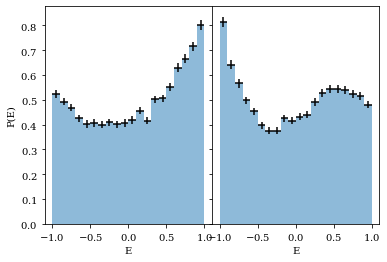

In [4]:
from matplotlib.pyplot import subplots 

b = linspace(-1,1,21)
hist1 = histogram(data1,b,normalize=True)
hist2 = histogram(data2,b,normalize=True)

fig, ax = subplots(ncols=2,sharey=True, gridspec_kw={'wspace':0})

for i,(a, h) in enumerate(zip(ax,[hist1,hist2])):
    plot_hist(*h,ax=a,as_bar=True,alpha=.5,label=f'Data {i}')
    a.set_xlabel('E')
    if i==0: a.set_ylabel('P(E)')

We want to fit two PDFs to each of these - the null PDF 

Vi vil tilpasse to PDF'er til hver af disse - nul-hypotesen med PDF

$$f'(E;\alpha,\beta) = 1+\alpha E + \beta E^2\quad E\in[-1,1]\quad,$$ 

and the alternative PDF

og den alternative hypotese med PDF

$$g'(E;\alpha,\beta,\gamma) = 1+\alpha E + \beta E^2 + \gamma E^3\quad E\in[-1,1]\quad,$$ 

both of which are _not_ normalised.  Thus, we need to calculate the normalisation of $f'$ and $g'$ first.  We can evaluate the normalisation of $g'$ and then set $\gamma=0$ for $f'$.  We find 

som begge er _ikke_ normaliseret. Vi skal derfor først beregne normaliseringen af $f'$ og $g'$. Vi kan evaluere normaliseringen af $g'$ og derefter indsætte $\gamma=0$ til $f'$. Vi finder

In [5]:
from sympy import symbols, Eq, Integral,Function
alpha, beta, gamma, E = symbols('alpha beta gamma E',real=True)
gp = 1 + alpha*E + beta*E**2 + gamma*E**3 
i = gp.integrate((E,-1,1)).simplify().factor()
Eq(Integral(Function("g'")(E),(E,-1,1)), i) 

Eq(Integral(g'(E), (E, -1, 1)), 2*(beta + 3)/3)

Thus our _normalized_ PDFs becomes 

\begin{align*}
  f(E;\alpha,\beta)        &= \frac{1 + \alpha E+\beta E^2             }{2\left(\frac{\beta}{3}+1\right)}\\
  g(E;\alpha,\beta,\gamma) &= \frac{1 + \alpha E+\beta E^2 + \gamma E^3}{2\left(\frac{\beta}{3}+1\right)}\\
  \quad.
\end{align*}

The two PDFs are similar enough that we will code this into a single function which we can use 

Således bliver vores _normaliserede_ PDF'er

\begin{align*}
  f(E;\alpha,\beta)        &= \frac{1 + \alpha E+\beta E^2             }{2\left(\frac{\beta}{3}+1\right)}\\
  g(E;\alpha,\beta,\gamma) &= \frac{1 + \alpha E+\beta E^2 + \gamma E^3}{2\left(\frac{\beta}{3}+1\right)}\\
  \quad.
\end{align*}

De to PDF'er er ens nok til at vi koder dette til en enkelt funktion, som vi kan bruge

In [6]:
def pdf(E,alpha,beta,gamma=0):
    return (1+alpha*E+beta*E**2+gamma*E**3)/(2*(beta/3 + 1))

Next, we want to evaluate the two PDFs, $f$ for $H_0$ and $g$ for $H_1$, over our two data sets $D_1,D_2$ to obtain likelihood estimates of 

\begin{align*}
  P(D_1|H_0) &&& \text{$D_1$ given $H_0$ is true}\\
  P(D_1|H_1) &&& \text{$D_1$ given $H_1$ is true}\\
  P(D_2|H_0) &&& \text{$D_2$ given $H_0$ is true}\\
  P(D_2|H_1) &&& \text{$D_2$ given $H_1$ is true}\quad.\\
\end{align*}
  
We calculate the combinations and evaluate the MLE fit in each case 

Dernæst ønsker vi at evaluere de to PDF'er, $f$ for $H_0$ og $g$ for $H_1$ over vores to datasæt $D_1,D_2$ for at få sandsynlighedsestimater af

\begin{align*}
  P(D_1|H_0) &&& \text{$D_1$ givet $H_0$ er sand}\\
  P(D_1|H_1) &&& \text{$D_1$ givet $H_1$ er sand}\\
  P(D_2|H_0) &&& \text{$D_2$ givet $H_0$ er sand}\\
  P(D_2|H_1) &&& \text{$D_2$ givet $H_1$ er sand}\quad.\\
\end{align*}
  
Vi beregner kombinationerne og vurderer MLE-fit i hvert tilfælde

We define the function `do_fit` that will perform the fit for us.  Since we want to know the final likelihood we pass `full_output` to `mle_fit` and in the function we define the simple container class `_ret` that stores the found parameters, covariance between them, the _negative_ logarithmic likelihood $-\ell$, as well as the histogram.  The latter is there to make it easier to plot. 

Vi definerer funktionen `do_fit`, der udfører tilpasningen for os. Da vi ønsker at kende den endelige sandsynlighed, giver vi `full_output` til `mle_fit`, og i funktionen definerer vi den simple containerklasse `_ret`, der gemmer de fundne parametre, kovariansen mellem dem , den _negative_ logaritmiske sandsynlighed $-\ell$, såvel som histogrammet. Sidstnævnte er dér for at gøre det lettere at plotte.

In [7]:
def do_fit(d,h,p0):
    p,cov,opt = mle_fit(pdf,d,p0,full_output=True)
    
    class _ret:
        def __init__(self,p,cov,opt,h):
            self.p    = p 
            self.cov  = cov 
            self.nllh = opt.fun 
            self.h    = h 
            
    return _ret(p,cov,opt,h)

comp = [[(dn,hn, do_fit(d,h,p0))
         for hn,p0 in [('H0',(0.1,0.1)),
                       ('H1',(0.1,0.1,0.1))]] 
        for dn,d,h in [('D1',data1,hist1),
                       ('D2',data2,hist2)]]

### Ruling out the null-hypothesis

We want to evaluate the log-likelihood ratio 

### At udelukke nulhypotesen

Vi ønsker at evaluere forholdet mellem logarithmen af sandsynlighederne

$$\lambda(H_1,D_x) 
= 2\log\left(\frac{\mathcal{L}(D_x|H_1)}{\mathcal{L}(D_x|H_0)}\right) 
= 2\left(\log\mathcal{L}(H_1|D_x)-\log\mathcal{L}(H_0|D_x)\right) 
= 2\Delta\left(\log\mathcal{L}(D_x)\right)\quad,$$ 

and the corresponding $p$-value, given by evaluating the probability of $\chi^2=2\Delta\left(\log\mathcal{L}(D_x)\right)$ and $\nu=2$. 

While we're calculating these, we also plot the data, and the fitted functions.  The plot will show the calculated $p$-value for each data set.  A large $p$-value ($>5\%$ or so) means that the null-hypothesis is _not_ rejected. 

og den tilsvarende $p$-værdi givet ved at evaluere sandsynligheden for $\chi^2=2\Delta\left(\log\mathcal{L}(D_x)\right)$ og $\nu=2$.

Mens vi beregner disse, plot vi også dataene og de tilpasset funktioner. Plottet viser den beregnede $p$-værdi for hvert datasæt. En stor $p$-værdi ($>5\%$ eller deromkring) betyder, at null-hypotesen _ikke_ er afvist.

Top row: Fit of $H_0$ and $H_1$ to data set $D_1$.  Bottom row: Fit of $H_0$ and $H_1$ to data set $D_1$.  The logarithm likelihood $\ell$ is shown for all cases together with the fitted PDF.  The insert boxes shows the likelihood ratio $\lambda$ and its associated $p$-value.  For data set $D_1$ (top row), we _cannot_ reject the null-hypothesis $H_0$ as the $p$-value is larger than $5\%$.  However, in for $D_2$ we _must_ reject the null-hypothesis as the $p$-value is very small. 

Øverste række: Tilpasning af $H_0$ og $H_1$ til datasæt $D_1$. Nederste række: Tilpasning af $H_0$ og $H_1$ til datasæt $D_1$. Den logaritmiske sandsynlighed $\ell$ vises for alle tilfælde sammen med den tilpasset PDF. Indsætningsbokse viser sandsynlighedsforholdet $\lambda$ og dets tilhørende $p$-værdi. For datasæt $D_1$ (øverste række) kan vi _ikke_ afvise nul-hypotesen $H_0$, da $p$-værdien er større end $5\%$. Men for $D_2$ _skal_ vi afvise nul-hypotesen, da $p$-værdien er meget lille.

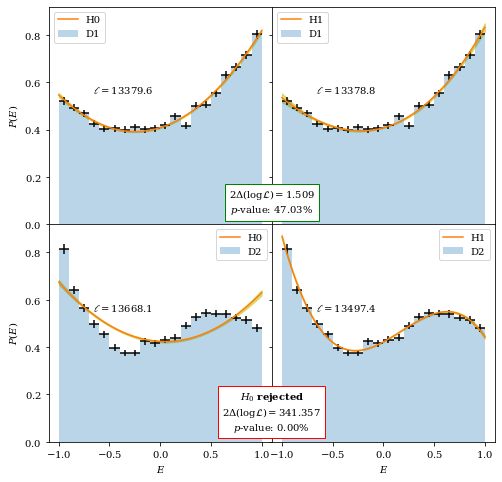

In [8]:
from matplotlib.pyplot import subplots
from scipy.stats import chi2 

fig, ax = subplots(ncols=2,nrows=2,
                       sharex=True,sharey=True,
                       gridspec_kw=dict(hspace=0,wspace=0),
                       figsize=(8,8))

xrng = linspace(-1,1,100)

for fd,ar in zip(comp,ax):
    ar[0].set_ylabel(r'$P(E)$')
    
    for (dn,hn,f),a in zip(fd,ar):
        # print(f'=== Data: {dn} Hypothesis: {hn} ===')
        plot_hist(*f.h,ax=a,label=dn,as_bar=True,alpha=.3)
        plot_fit_func(xrng,pdf,f.p,f.cov,label=hn,ax=a,color='C1')
        a.text(.2,.6,fr'$\ell={f.nllh:.1f}$',
               transform=a.transAxes)
        a.legend()
        
    apr = ar[1].get_position() 
    ll  = apr.bounds[0]
    bb  = apr.bounds[1] + 0.02
    
    dllh = likelihood_ratio(-fd[1][2].nllh, -fd[0][2].nllh)
    pval = chi2.sf(dllh,2)
    fig.text(ll,bb,
             (r'' if pval > 0.05 else r'$H_0~\mathbf{rejected}$'+'\n') +
             fr'$2\Delta\left(\log\mathcal{{L}}\right)={dllh:7.3f}$'+'\n'+
             fr'$p$-value: ${pval*100:.2f}\%$',
             horizontalalignment='center',
             backgroundcolor='white',
             bbox=dict(edgecolor='green' if pval > 0.05 else 'red', 
                       facecolor='white', alpha=1))
    
ax[1,0].set_xlabel(r'$E$')
ax[1,1].set_xlabel(r'$E$');

We see that 

- for the first data set we _cannot_ reject the null-hypothesis - the alternative hypothesis does not do a better job at describing the data, while 
- for the second data set, we _must_ reject the null-hypothesis - the alternative does a much better job, as is quite evident from the plots above, and the numbers back up that intuition. 

Vi ser at

- for det første datasæt kan vi _ikke_ afvise nulhypotesen - den alternative hypotese gør ikke et bedre stykke arbejde med at beskrive dataene, mens
- for det andet datasæt, _skal_ vi afvise nulhypotesen - alternativet gør det langt bedre, som også er tydeligt fra figuren, og tallene understøtter denne intuition.

Note, we could have performed least-squares fits and then calculated the (logarithmic) likelihoods and from them the likelihood ratio $\lambda$.  

Bemærk, vi kunne have udført mindste-kvadrat tilpasninger og dernæst beregenet de (logarithmiske) sandsynligheder om med dem beregnet $\lambda$.  

## Hypothesis testing with discrete distributions

A tool for testing if a hypothesis of a discrete distribution of the random variable $P$ is consistent with an observed distribution of a discrete random variable $Q$ is the [Kullback-Leibler discrepancy](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (or divergence, or _relative entropy_)

$$D_{\mathrm{KL}}(P|Q) = \sum_i P_i\log\left(\frac{P_i}{Q_i}\right)\quad,$$ 

where the sum runs over all possible (discrete) outcomes of $P$. 

Et værktøj til at teste, om en hypotese om en diskret fordeling af den tilfældige variable $P$ er i overensstemmelse med en observeret distribution af en diskret tilfældig variabel $Q$, er [Kullback-Leibler uoverensstemmelse](https://en.wikipedia.org/wiki/Kullback%E2%80%93Libler_divergens) (eller divergens eller
_relativ entropi_)

$$D_{\mathrm{KL}}(P|Q) = \sum_i P_i\log\left(\frac{P_i}{Q_i}\right)\quad,$$

hvor summen løber over alle de mulige (diskrete) udfalg af $P$.

### Example: Prevalence of digits in $\pi-3$ 

Given the observation of the prevalence of each of the digits $0,1,\ldots,9$ in $\pi-3$ up to some number of digits $N$

### Eksempel: Forekomsten af cifre i $\pi-3$

I betragtning af observationen af forekomsten af hvert af cifrene $0,1,\ldots,9$ i $\pi-3$ op til et antal cifre $N$

Prevalence of the digits $[0,1,\ldots,9]$ in $\pi-3$ for some number of decimal digits. 

Forekomsten af cifrene $[0,1,\ldots,9]$ i $\pi-3$ for et antal decimal pladser.

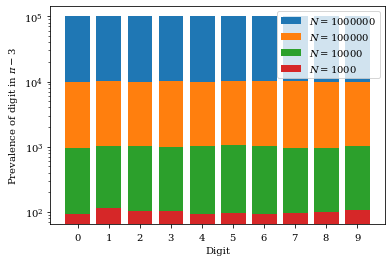

In [9]:
from matplotlib.pyplot import bar, legend,yscale,ylabel,xlabel,xticks
from numpy import arange

prev = {1000:    [   93,  116,   103,   102,    93,    97,   94,   95,  101,   106],
        10000:   [  968, 1026,  1021,   974,  1012,  1046, 1021,  970,  948,  1014],
        100000:  [ 9999,10137,  9908, 10025,  9971, 10026,10029,10025, 9978,  9902],
        1000000: [99959,99758,100026,100229,100230,100359,99548,99800,99985,100106]}
for k in list(prev.keys())[::-1]:
    bar(arange(10),prev[k],.8,label=f'$N={k}$')
yscale('log')
ylabel(r'Prevalence of digit in $\pi-3$')
xlabel('Digit')
xticks(arange(10))
legend();

#print(f'{"N":7s} '+' '.join([f'{d:6d}' for d in range(10)]) + '\n' +
#      '\n'.join([f'{n:7d} ' + ' '.join([f'{m:6d}' for m in mm]) for n,mm in prev.items()]))

we can calculate $D_{\mathrm{KL}}$ assuming that all digits are equally likely - i.e., $p_i=1/10$. 

kan vi beregne $D_{\mathrm{KL}}$ under forudsætning af, at alle cifre er lige sandsynlige - dvs. $p_i=1/10$.

We define a function to calculate $D_{\mathrm{KL}}$ given $p_i$, and $q_i=m_i/n$, where $q_i$ is the number of times we have outcome $i$ out of $n$ trials. 

Vi definerer en funktion til at beregninge $D_{\mathrm{KL}}$ givet $p_i$ og $q_i=m_i/n$, hvor $q_i$ er antallet af gange, vi har resultatet $i$ ud af $n$ forsøg.

In [10]:
def dkl(p,q):
    from numpy import log, atleast_1d
    p1 = atleast_1d(p)
    q1 = atleast_1d(q)
    
    return (p1 * log(p1/q1)).sum()

Let us evaluate $D_{\mathrm{KL}}$ for each $N$ and plot that versus $N$. 

Lad os evaluere $D_{\mathrm{KL}}$ for hver $N$ og plot det mod $N$.

Kullback-Leibler discrepancy $D_{\mathrm{KL}}$ for the prevalence of digits in $\pi-3$ for various number of decimal places. 

Kullback-Leibler uoverensstemmelse $D_{\mathrm{KL}}$ for forekomsten af cifre i $\pi-3$ for forskellige antal decimal pladser.

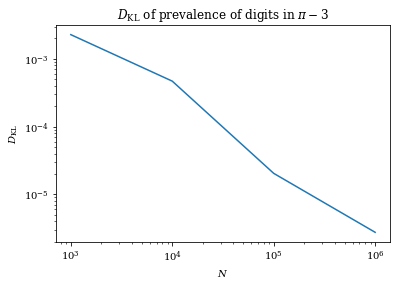

In [11]:
from matplotlib.pyplot import plot, title, xscale
from numpy import array, asarray

dkl1 = array([(n,dkl(1/10,asarray(m)/n)) for n,m in prev.items()])
plot(dkl1[:,0],dkl1[:,1])
yscale('log')
xscale('log')
xlabel('$N$')
ylabel(r'$D_{\mathrm{KL}}$')
title(r'$D_{\mathrm{KL}}$ of prevalence of digits in $\pi-3$');

To appreciate what this means, consider $N=1000$ random digits $Q \sim U\{0,9\}$ - what is the expected $D_{\mathrm{KL}}$ of that?   To evaluate the expectation value, we perform $M=1000$ such experiments and calculate the mean. 

First, a function to do $M$ experiments each drawing $N$ random digits, and returning $D_{\mathrm{KL}}$ for each experiment. 

For at forstå, hvad dette betyder, skal overvejer vi $N=1000$ tilfældige cifre $Q \sim U\{0,9\}$. Hvad er den forventede $D_{\mathrm{KL}}$ af det? For at evaluere forventningsværdien udfører vi $M=1000$ sådanne eksperimenter og beregner gennemsnittet.

Først en funktion til at udføre $M$ eksperimenter hver med $N$ tilfældige cifre og returnerer $D_{\mathrm{KL}}$ af hvert eksperiment.

In [12]:
def randdkl(ntries,n):
    from numpy import unique, array
    from numpy.random import randint
    
    return array([dkl(1/10,unique(r,return_counts=True)[1]/n)
                  for r in randint(0,10,size=(ntries,n))])

We would like to draw the result of the experiments as a distribution and overlay the $\pi-3$ discrepancy, and evaluate how many of our experiments had a $D_{\mathrm{KL}}$ value that is higher.  The function below does that. 

Vi vil gerne tegne resultatet af eksperimenterne som en fordeling og overlægge $\pi-3$-uoverensstemmelsen og evaluere, hvor mange af vores eksperimenter, der havde en $D_{\mathrm{KL}}$-værdi, der er højere. Funktionen herunder gør det.

In [13]:
def draw_randdkl(t,n,pi3):
    from matplotlib.pyplot import gca
    from numpy import log10,sqrt
    
    ax = gca()
    
    ax.hist(t,100,label=r'Random sampling of $U~\{0,9\}$')
    
    m   = int(log10(len(t)+.5))
    mu  = t.mean()
    dmu = t.std()/sqrt(len(t))
    ax.axvline(mu,color='C1',ls='--',
               label=r'$\overline{D_{\mathrm{KL}}}='
                      +fr'{mu:.{m+1:}f}\pm'
                      +fr'{dmu:.{m+1}f}$')
    
    if pi3.get(n,False):
        pdkl = dkl(1/10,asarray(pi3[n])/n)
        ax.axvline(pdkl,color='C2',ls='-.',
                   label=fr'$\pi-3\ D_{{\mathrm{{KL}}}}={pdkl:.{m+1:}f}$')
        
        l = (t>pdkl).sum()/len(t)
        ax.text(.5,.5,fr'${l*100:.1f}\%$ larger than for $\pi-3$',
                transform=gca().transAxes)
                    
    ax.set_xlabel(r'$D_{{\mathrm{{KL}}}}$')
    ax.set_title(fr'$D_{{\mathrm{{KL}}}}$ for $N={n}$')
    ax.legend();

We run the test for $N=1000$ and $M=10000$.  

Vi kører testen for $N=1000$ og $M=10000$.

Distribution of $D_{\mathrm{KL}}$ for uniform random numbers in $[0,\ldots,9]$ with $N=1000$.

Fordeling af $D_{\mathrm{KL}}$ for ensartede tilfældige tal i $[0,\ldots,9]$ med $N=1000$.

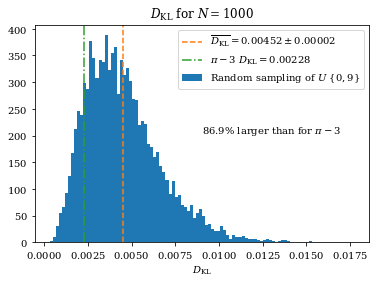

In [14]:
t = randdkl(10000,1000)
draw_randdkl(t,1000,prev)

We see that the $\pi-3$ discrepancy is actually quite low from what we would expect.  

Let us use the function above to calculate the mean discrepancy for each of the $N$ given for $\pi-3$ above, and plot these together. 

Vi ser, at $\pi-3$-afvigelsen faktisk er ret lav i forhold til hvad vi ville forvente.

Lad os bruge funktionen ovenfor til at beregne den gennemsnitlige uoverensstemmelse for hver af $N$, der er givet for $\pi-3$ ovenfor, og plotte disse sammen.

In [15]:
def randdkl_m(m,n):
    from numpy import sqrt, percentile
    d = randdkl(m,n)
    return [percentile(d,p) for p in (50,5,95,50-65/2.,50+65/2)]

data = array([(n,dpi,*randdkl_m(100,int(n))) for n,dpi in dkl1])

$D_{\mathrm{KL}}$ of prevalence of digits in $\pi-$ and for uniform digits in $[0,\ldots,9]$.  The bands shows the $65\%$ (green) and $95\%$ (yellow) confidence limits from the uniform distribution of digits.  

$D_{\mathrm{KL}}$ for udbredelse af cifre i $\pi-$ og for ensartede cifre i $[0,\ldots,9]$. Båndene viser $65\%$ (grøn) og $95\%$ (yellow) tillidsgrænser fra ensartet fordeling af cifre.

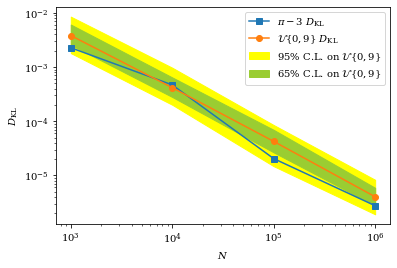

In [16]:
from matplotlib.pyplot import fill_between

plot(data[:,0],data[:,1],'-s',label=r'$\pi-3\ D_{\mathrm{KL}}$')
fill_between(data[:,0],data[:,3],data[:,4],color='yellow',
             label=r'$95\%$ C.L. on $\mathcal{U}\{0,9\}$')
fill_between(data[:,0],data[:,5],data[:,6],color='yellowgreen',
             label=r'$65\%$ C.L. on $\mathcal{U}\{0,9\}$')
plot(data[:,0],data[:,2],'-o',label=r'$\mathcal{U}\{0,9\}\ D_{\mathrm{KL}}$')
yscale('log')
xscale('log')
xlabel('$N$')
ylabel(r'$D_{\mathrm{KL}}$')
legend();

Here, the picture changes a bit.  In fact, the $\pi-3$ numbers are consistent with the random draw experiment within $95\%$ confidence limits (what this means we will see later), and mostly within $65\%$.  Thus, the assumption that the digits of $\pi$ are uniformly distributed cannot be rejected at any reasonable limit. 

Her ændrer billedet sig lidt. Faktisk er $\pi-3$-numrene i overensstemmelse med tilfældigt-træk eksperiment inden for $95\%$-tillidsgrænser (hvad dette betyder, at vi vil se senere), og for det meste inden for $65\%$. Antagelsen om, at cifrene i $\pi$ er ensartet fordelt, kan således ikke afvises på med nogen rimelig sandsynlighed.

## Summary 

We have looked at two cases of hypothesis testing 

- Continuous random variable with probability distribution $f$, for which we used the likelihood ratio 

  $$\lambda = 2\log\left(\frac{\mathcal{L}(H_1)}{\mathcal{L}(H_0)}\right)\quad,$$ 
  
  which is $\chi^2$ distributed with $\nu=2$ degrees of freedom. 
  
- Discrete random variable with probabilities $p_i$ for which we used the Kullback-Leibler discrepancy 

  $$D_{\mathrm{KL}} = \sum_{i} p_i\log\left(\frac{p_i}{q_i}\right)\quad,$$ 
  
  where the sum runs over all possible outcomes and $q_i$ is the observed probability $n_i/N$. 
  
The function `likelihood_ratio` defined in the previous chapter helps us in the first case, while the function `dkl` will help us in the second case.  We have seen that the prevalence of $[0,\ldots,9]$ in the digits of $\pi-3$ are consistent with a uniform distribution (i.e., we cannot rule out that they are not). 

## Opsummering

Vi har set på to tilfælde af hypotesetest

- Kontinuerlig tilfældig variabel med sandsynlighedsfordelingen $f$, hvor vi brugte sandsynlighedsforholdet

  $$\lambda = 2\log\left(\frac{\mathcal{L}(H_1)}{\mathcal{L}(H_0)}\right)\quad,$$
  
  som er $\chi^2$ fordelt med $\nu=2$ frihedsgrader.
  
- Diskret tilfældig variabel med sandsynligheder $p_i$, som vi brugte Kullback-Leibler uoverensstemmelsen på

  $$D_{\mathrm{KL}} = \sum_{i} p_i\log\left(\frac{p_i}{q_i}\right)\quad,$$
  
  hvor summen løber over alle mulige udfald og $q_i$ er den observerede sandsynlighed $n_i/N$.
  
Funktionen `likelihood_ratio` defineret i det forrige kapitel hjælper os i det første tilfælde, mens funktionen `dkl` kan hjælpe os i det andet tilfælde. Vi har set, at forekomsten af $[0,\ldots,9]$ i decimal cifrene af $\pi-3$ stemmer overens med en ensartet fordeling (dvs. vi kan ikke udelukke, at de ikke er det).

In [17]:
dkl.__doc__ = \
"""Calculate the Kullback-Leibler discrepancy (or relative entropy) 
of a discrete random variable with assumed probability p[i] and 
observed probability q[i]=n[i]/N 

Parameters
----------
p : array-like 
    Assumed probabilities 
q : array-like 
    Observed probabilities 
    
Returns
------- 
Dkl : float 
    The Kullback-Leibler discrepancy 
    
        Dkl = sum_i p_i log(p_i / q_i)
"""